<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 6 (midnight), 2025 -->

# Project 1 on Machine Learning, deadline October 6 (midnight), 2025
**Data Analysis and Machine Learning FYS-STK3155/FYS4155**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The
links at
<https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects>
contain more information. There you can find examples of previous
reports, the projects themselves, how we grade reports etc. How to
write reports will also be discussed during the various lab
sessions. Please do ask us if you are in doubt.

When using codes and material from other sources, you should refer to
these in the bibliography of your report, indicating wherefrom you for
example got the code, whether this is from the lecture notes,
softwares like Scikit-Learn, TensorFlow, PyTorch or other sources. These sources
should always be cited correctly. How to cite some
of the libraries is often indicated from their corresponding GitHub
sites or websites, see for example how to cite Scikit-Learn at
<https://scikit-learn.org/dev/about.html>.

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

If you would like to study other data sets, feel free to propose other
sets. What we have proposed here are mere suggestions from our
side. If you opt for another data set, consider using a set which has
been studied in the scientific literature. This makes it easier for
you to compare and analyze your results. Comparing with existing
results from the scientific literature is also an essential element of
the scientific discussion.  The University of California at Irvine
with its Machine Learning repository at
<https://archive.ics.uci.edu/ml/index.php> is an excellent site to
look up for examples and
inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally
interesting site. Feel free to explore these sites. When selecting
other data sets, make sure these are sets used for regression problems
(not classification).

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including Ordinary Least Squares (OLS) reegression, Ridge regression and LASSO regression.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

We will study how to fit polynomials to specific
one-dimensional functions (feel free to replace the suggested function with more complicated ones).

We will use Runge's function (see <https://en.wikipedia.org/wiki/Runge%27s_phenomenon> for a discussion).  The one-dimensional function we will study is

$$
f(x) = \frac{1}{1+25x^2}.
$$

Our first step will be to perform an OLS regression analysis of this
function, trying out a polynomial fit with an $x$ dependence of the
form $[x,x^2,\dots]$.  You can use a uniform distribution to set up the
arrays of values for $x \in [-1,1]$, or alternatively use a fixed step size.
Thereafter we will repeat many of the same steps when using the Ridge and Lasso regression methods,
introducing thereby a dependence on the hyperparameter  (penalty) $\lambda$.

We will also include bootstrap as a resampling technique in order to
study the so-called **bias-variance tradeoff**.  After that we will
include the so-called cross-validation technique.

### Part a : Ordinary Least Square (OLS) for the Runge function

We will generate our own dataset for abovementioned  function
$\mathrm{Runge}(x)$ function with $x\in [-1,1]$. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using for example the  pseudoinverse function **pinv** from  **Numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ up to  order $15$ or higher. Explore the dependence on the number of data points and the polynomial degree.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree 15).
Plot also the parameters $\theta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For the scaling  you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings

In [2]:
#Generate Data

f = lambda x: 1/(1+25*x**2)
#np.random.seed(123)
n_samples = 1000
x_=np.random.uniform(-1,1,n_samples)
noise = np.random.normal(loc=0, scale=0.1, size=n_samples)
y_with_noise = f(x_) + noise
y_without_noise = f(x_)

In [3]:
#descriptive statistics
print(y_with_noise.min())
print(y_without_noise.max())
print(np.abs(y_with_noise).min())
#highest abs value is 100 times larger than smallest
#we need scaling

-0.2852647644920585
0.9999846302044738
7.3444636474157e-05


In [4]:
def theta_OLS(X,y):
     return np.linalg.pinv(np.transpose(X) @ X) @ np.dot(np.transpose(X), y)

In [5]:
X_unscaled_15=PolynomialFeatures(15).fit_transform(x_.reshape(-1,1))
print(X_unscaled_15.mean(axis=0))
print(X_unscaled_15.var(axis=0))
# => we need scaling or is it better without scaling because this

[ 1.         -0.028827    0.33473935 -0.01647965  0.19811248 -0.01112865
  0.14034078 -0.00812782  0.10881247 -0.00611672  0.08900496 -0.00465139
  0.07539426 -0.00353313  0.06544791 -0.00265474]
[0.         0.33390835 0.08606205 0.1400692  0.06956392 0.08888112
 0.05569872 0.06538185 0.04600912 0.05181067 0.03906382 0.04294399
 0.03390296 0.03669716 0.02994722 0.03206721]


In [6]:

mse_errors_ols=np.zeros(15)
r_squared_ols=np.zeros(15)
degrees = np.arange(1,16)
for degree in degrees:
    X = PolynomialFeatures(degree).fit_transform(x_.reshape(-1,1))
    X_scaled = StandardScaler().fit_transform(X)
    y_centered = y_with_noise - y_with_noise.mean()
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_centered, test_size = 0.3)
    y_pred = X_test @theta_OLS(X_train, y_train)
    mse_errors_ols[degree-1] = (mean_squared_error(y_test, y_pred))
    r_squared_ols[degree-1] = (r2_score(y_test, y_pred))

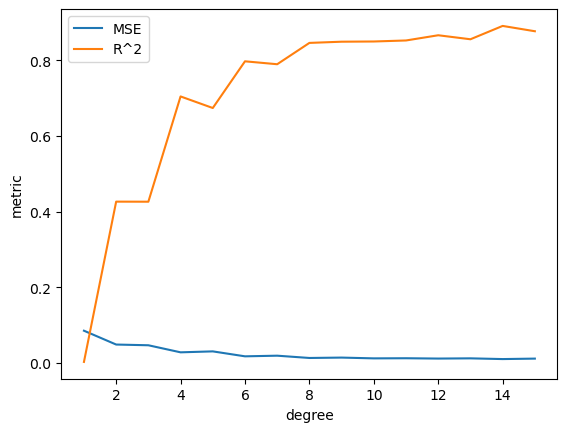

In [7]:
plt.plot(degrees, mse_errors_ols, label = "MSE")
plt.plot(degrees, r_squared_ols, label ="R^2")
plt.xlabel("degree")
plt.ylabel("metric")
plt.legend()
plt.show()

In [8]:
def theta_ridge(X,y,lmbda):
    return np.linalg.pinv(X.T @ X + lmbda * np.eye(X.shape[1])) @ X.T @ y

### Part b: Adding Ridge regression for  the Runge  function

Write your own code for the Ridge method as done in the previous
exercise. The lecture notes from week 35 and 36 contain more information. Furthermore, the  results from the exercise set from week 36 is something you can reuse here.

Perform the same analysis as you did in the previous exercise but now for different values of $\lambda$. Compare and
analyze your results with those obtained in part a) with the OLS  method. Study the
dependence on $\lambda$.

In [9]:
degree = 5
n_lambda = 100
mse_errors_ridge=np.zeros(n_lambda)
r_squared_ridge=np.zeros(n_lambda)
lambdas = np.linspace(0,10,n_lambda)
X = PolynomialFeatures(degree).fit_transform(x_.reshape(-1,1))
X_scaled = StandardScaler().fit_transform(X)
y_centered = y_with_noise - y_with_noise.mean()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_centered, test_size = 0.3)
for i, lambda_ in enumerate(lambdas):
    y_pred = X_test @theta_ridge(X_train, y_train, lambda_)
    mse_errors_ridge[i] = (mean_squared_error(y_test, y_pred))
    r_squared_ridge[i] = (r2_score(y_test, y_pred))


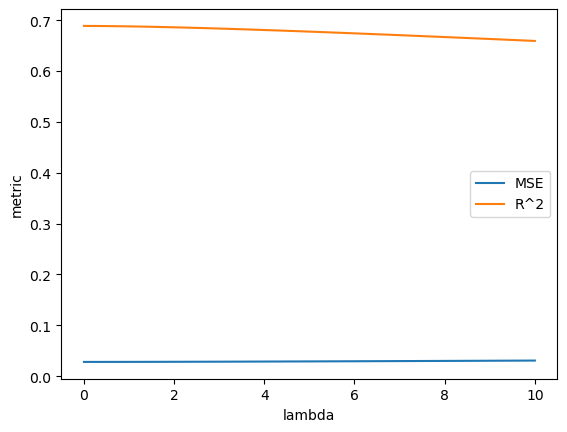

In [10]:
plt.plot(lambdas, mse_errors_ridge, label = "MSE")
plt.plot(lambdas, r_squared_ridge, label ="R^2")
plt.xlabel("lambda")
plt.ylabel("metric")
plt.legend()
plt.show()

#gets worse for large lambda

### Part c: Writing your own gradient descent code

Replace now the analytical expressions for the optimal parameters
$\boldsymbol{\theta}$ with your own gradient descent code. In this exercise we
focus only on the simplest gradient descent approach with a fixed
learning rate (see the exercises from week 37 and the lecture notes
from week 36).

Study and compare your results from parts a) and b) with your gradient
descent approch. Discuss in particular the role of the learning rate.

In [11]:
def gradient_descent(X,y,max_iter, precision, regression_method, gd_method, stochastic,batch_size, lmbda, hparameters_for_gd_method,  initial_value= None):
#regression_method={ols, ridge, lasso}
#gd_method ={normal, momentum, adagrad, rmsprop, adam}
#initial value:
#stochastic: boolean whether to use stochastic gradient descent
#batch_size: only used for stochstic gradient descent
#lmbda: hyperparameter for ridge and lasso, for ols not needed
#hparameters_for_gd_method: List, with e.g. initial point, learning rate and momentum for momentum
    n_samples=X.shape[0]
    n_features =X.shape[1]
    X = X.astype(np.float64)
    y = y.astype(np.float64)
    
    if stochastic:
        if regression_method == 'ols':
            def mini_batch_gradient(X_batch, y_batch, theta_batch):
                return 2/n_samples* (X_batch.T @ X_batch @theta_batch - X_batch.T @ y_batch)
        elif regression_method == 'ridge':
            def mini_batch_gradient(X_batch, y_batch, theta_batch):
                return (X_batch.T @ X_batch @theta_batch - X_batch.T @ y_batch) + lmbda*theta_batch
        elif regression_method == 'lasso':
            def mini_batch_gradient(X_batch, y_batch, theta_batch):
                return 2/n_samples*(X_batch.T @ X_batch @theta_batch - X_batch.T @ y_batch) + lmbda*np.sign(theta_batch)
        else:
            def mini_batch_gradient(X_batch, y_batch, theta_batch):
                return -1
            raise ValueError("invalid input for regression_method")
        
        def gradient(theta):
            shuffled_indices = np.random.choice(range(n_samples), n_samples, replace = False)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            m = int(n_samples/batch_size) # number of batches
            array_batch_gradients = np.zeros((m, n_features))
            for i in range(m):
                xi = X_shuffled[i*batch_size:(i+1)*batch_size]
                yi = y_shuffled[i*batch_size: (i+1)*batch_size] #exclude the last samples?
                batch_gradient_i = mini_batch_gradient(xi,yi, theta)
                array_batch_gradients[i] = batch_gradient_i
            return np.mean(array_batch_gradients, axis = 0)

    else:
        xtx = X.T @ X
        xty = X.T @ y
        if regression_method == 'ols':
            def gradient(theta):
                return 2/n_samples* (xtx @ theta - xty)
        elif regression_method == 'ridge':
            def gradient(theta):
                return 2/n_samples*(xtx @ theta - xty + lmbda *theta)
        elif regression_method == 'lasso':
            def gradient(theta):
                return 2/n_samples* (xtx @ theta - xty + lmbda *np.sign(theta))
        else:
            def gradient(theta):
                return -1
            raise ValueError("invalid input for regression_method")    

    
    if gd_method == 'normal':
        if initial_value is None:
            initial_value = np.min(X, axis =0) + np.random.uniform(size =n_features) * (np.max(X, axis =0) - np.min(X, axis =0))
        theta_new = initial_value 
        theta_old = initial_value + np.ones(n_features)
        count = 0
        learning_rate = hparameters_for_gd_method[0]
        while (np.linalg.norm(theta_old - theta_new, ord = None) > precision) and count < max_iter: #which norm? np.inf for inf norm
            theta_old = theta_new
            theta_new = theta_old - learning_rate * gradient(theta_old)
            count += 1
            #print('theta' +str(theta_new))
        if(count == max_iter):
            print('calculation limit exceeded')
        #print(theta_new)
        #print(theta_old)
        #print(count)
        return [theta_new, count]

    elif gd_method == 'momentum':
        momentum = hparameters_for_gd_method[1]
        change = 0
        learning_rate = hparameters_for_gd_method[0]
        if initial_value is None:
            initial_value = np.min(X, axis =0) + np.random.uniform(size =n_features) * (np.max(X, axis =0) - np.min(X, axis =0))
        theta_new = initial_value 
        theta_old = initial_value + np.ones(n_features)
        count = 0
        while (np.linalg.norm(theta_old - theta_new, ord = None) > precision) and count < max_iter: #which norm? np.inf for inf norm
            theta_old = theta_new
            change = learning_rate * gradient(theta_old) + momentum * change
            theta_new = theta_old - change 
            count += 1
        if(count == max_iter):
            print('calculation limit exceeded')
        return [theta_new, count]
    
    elif gd_method == 'adagrad':
        learning_rate = hparameters_for_gd_method[0]
        epsilon = hparameters_for_gd_method[1]
        if initial_value is None:
            initial_value = np.min(X, axis =0) + np.random.uniform(size =n_features) * (np.max(X, axis =0) - np.min(X, axis =0))
        theta_new = initial_value 
        theta_old = initial_value + np.ones(n_features)
        G = np.zeros(n_features)
        gradient1 = np.zeros(n_features)
        count = 0
        while (np.linalg.norm(theta_old - theta_new, ord = None) > precision) and count < max_iter: #which norm? np.inf for inf norm
            theta_old = theta_new
            gradient1 = gradient(theta_old)
            G = G + np.square(gradient1)
            theta_new = theta_old - learning_rate * gradient1 / np.sqrt(epsilon + G)
            #print(np.sqrt(epsilon + r))
            count += 1
            if(count == max_iter):
                print('calculation limit exceeded')
        #print(theta_new)
        #print(theta_old)
        return [theta_new, count]

    elif gd_method == 'rmsprop':
        learning_rate = hparameters_for_gd_method[0]
        rho = hparameters_for_gd_method[1]
        epsilon = hparameters_for_gd_method[2]
        if initial_value is None:
            initial_value = np.min(X, axis =0) + np.random.uniform(size =n_features) * (np.max(X, axis =0) - np.min(X, axis =0))
        theta_new = initial_value 
        theta_old = initial_value + np.ones(n_features)
        v = np.zeros(n_features)
        gradient1 = np.zeros(n_features)
        count = 0
        while (np.linalg.norm(theta_old - theta_new, ord = None) > precision) and count < max_iter: #which norm? np.inf for inf norm
            theta_old = theta_new
            gradient1 = gradient(theta_old)
            v= rho * v + (1-rho) * gradient1**2
            theta_new = theta_old - learning_rate / np.sqrt(v + epsilon) * gradient1
            count += 1
        if ( count == max_iter):
            print('calculation limit exceeded')
        print(theta_new)
        print(theta_old)
        print(v)
        return [theta_new, count]

    elif gd_method == 'adam':
        learning_rate = hparameters_for_gd_method[0]
        beta_1 = hparameters_for_gd_method[1]
        beta_2 = hparameters_for_gd_method[2]
        epsilon = hparameters_for_gd_method[3]
        m=0
        v=0
        if initial_value is None:
            initial_value = np.min(X, axis =0) + np.random.uniform(size =n_features) * (np.max(X, axis =0) - np.min(X, axis =0))
        theta_new = initial_value 
        theta_old = initial_value + np.ones(n_features)
        count = 0
        while (np.linalg.norm(theta_old - theta_new, ord = None) > precision) and count < max_iter: #which norm? np.inf for inf norm
            count+=1
            theta_old = theta_new
            gradient1 = gradient(theta_old)
            m = beta_1 * m + (1-beta_1)*gradient1
            v = beta_2 * v + (1-beta_2)*gradient1**2
            m_tilde = m/(1-beta_1**count)
            v_tilde = v/(1-beta_2**count)
            theta_new = theta_old - learning_rate * m_tilde / (np.sqrt(v_tilde) + epsilon)
        if ( count == max_iter):
            print('calculation limit exceeded')
        print(theta_old)
        print(theta_new)
        return [theta_new, count]

    else: 
        raise ValueError('invalid input for gd_method')


In [12]:
lambda1= 0.1

In [13]:
X_train

array([[ 0.00000000e+00,  4.30355560e-01, -9.76277283e-01,
         7.24268392e-02, -7.42280080e-01,  3.90511586e-02],
       [ 0.00000000e+00, -6.51386136e-01, -5.81288193e-01,
        -1.33766803e-01, -6.48900471e-01,  6.76160194e-04],
       [ 0.00000000e+00, -1.51854472e+00,  1.65892474e+00,
        -1.94511158e+00,  1.80700492e+00, -2.01379283e+00],
       ...,
       [ 0.00000000e+00,  1.04541146e+00, -1.29976369e-02,
         5.52690569e-01, -3.35925463e-01,  2.48639953e-01],
       [ 0.00000000e+00, -7.27043570e-01, -4.53994394e-01,
        -1.97744693e-01, -5.97113214e-01, -2.38467401e-02],
       [ 0.00000000e+00,  7.89175673e-01, -5.18955128e-01,
         2.52343780e-01, -6.24862615e-01,  8.50519792e-02]])

In [14]:
theta_ols_stochastic_normal = gradient_descent(X_train, y_train, max_iter = 100000, precision = 0.0000001, regression_method ='ridge', gd_method= 'normal', stochastic=True, batch_size =100, lmbda = lambda1, hparameters_for_gd_method =[0.005, 0.9, 0.99, 1e-7 ], initial_value=np.zeros(X_train.shape[1]))

In [15]:
print(theta_ols_stochastic_normal)

[array([ 0.        ,  0.03891972, -0.65568787, -0.09423324,  0.47435164,
        0.06364653]), 2723]


In [16]:
def ols_analytic(X_ols, y_ols):
    return np.linalg.pinv(X_ols.T @ X_ols) @ np.dot(X_ols.T, y_ols)

def ridge_analytic(X_ridge, y_ridge, lambda_ridge):
    return np.linalg.pinv(X_ridge.T @ X_ridge + lambda_ridge * np.eye(X_ridge.shape[1])) @ np.dot(X_ridge.T, y_ridge)

In [17]:
print(ols_analytic(X_train, y_train))
print(ridge_analytic(X_train, y_train, lambda1))

[ 0.          0.04586317 -0.6689796  -0.11419615  0.48752133  0.07755419]
[ 0.          0.04470327 -0.66703889 -0.1108754   0.48559896  0.07524563]


In [18]:
Ridge(alpha =0.1, solver = 'sag').fit(X_train, y_train).coef_

array([ 0.        ,  0.04443769, -0.66708655, -0.11019963,  0.48565046,
        0.0747924 ])

In [19]:
warnings.filterwarnings("error", category=RuntimeWarning)
def tuning(function, parameters):
    #function based on parameters
    #parameters list
    results = np.zeros(len(parameters))
    for i, parameter in enumerate(parameters):
        try:
            results[i] = function(parameter)[1]
            print(f"parameter {parameter} results in {results[i]} iterations and result {function(parameter)[0]}")
        except RuntimeWarning:
            results[i] = np.inf
            print(f"parameter {parameter} results in error")
    print("overview:")
    print(f"parameters: {parameters}")
    print(f"results: {results}")
    print("best parameter is "+ str(parameters[np.argmin(results)]) + "with result" + str(np.min(results)))
    return results


In [20]:
function = lambda param: gradient_descent(X_train, y_train, max_iter = 50000, precision = 0.0000001, regression_method ='lasso', gd_method= 'normal', stochastic=False, batch_size =100, lmbda = 0.1, hparameters_for_gd_method =[param, 0.9, 0.99, 1e-7 ], initial_value=np.zeros(X_train.shape[1]))
parameters =[10**(i) for i in range(-6, 2)]
results = tuning(function, parameters)
print(results)

calculation limit exceeded
calculation limit exceeded
parameter 1e-06 results in 50000.0 iterations and result [ 0.          0.00110756 -0.01911282  0.00109144 -0.01411659  0.00103513]
calculation limit exceeded
calculation limit exceeded
parameter 1e-05 results in 50000.0 iterations and result [ 0.          0.00365711 -0.10303762  0.00145775 -0.05403654  0.0006993 ]
calculation limit exceeded
calculation limit exceeded
parameter 0.0001 results in 50000.0 iterations and result [ 0.          0.0123905  -0.29290634 -0.00355427  0.11148355 -0.00469038]
calculation limit exceeded
calculation limit exceeded
parameter 0.001 results in 50000.0 iterations and result [ 0.          0.01494642 -0.65722202 -0.0281399   0.47592796  0.01853984]
parameter 0.01 results in 45992.0 iterations and result [ 0.          0.03236445 -0.66532815 -0.07706206  0.48394296  0.05221623]
parameter 0.1 results in 6867.0 iterations and result [ 0.          0.03261729 -0.66533584 -0.07776401  0.48394926  0.05269649]
p

### Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

### Part e: Writing our own code for Lasso regression

LASSO regression (see lecture slides from week 36 and week 37)
represents our first encounter with a machine learning method which
cannot be solved through analytical expressions (as in OLS and Ridge regression). Use the gradient
descent methods you developed in parts c) and d) to solve the LASSO
optimization problem. You can compare your results with 
the functionalities of **Scikit-Learn**.

Discuss (critically) your results for the Runge function from OLS,
Ridge and LASSO regression using the various gradient descent
approaches.

### Part f: Stochastic gradient descent

Our last gradient step is to include stochastic gradient descent using
the same methods to update the learning rates as in parts c-e).
Compare and discuss your results with and without stochastic gradient
and give a critical assessment of the various methods.

### Part g: Bias-variance trade-off and resampling techniques

Our aim here is to study the bias-variance trade-off by implementing
the **bootstrap** resampling technique.  **We will only use the simpler
ordinary least squares here**.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your
test data, make first a figure similar to Fig. 2.11 of Hastie,
Tibshirani, and Friedman. Figure 2.11 of this reference displays only
the test and training MSEs. The test MSE can be used to indicate
possible regions of low/high bias and variance. You will most likely
not get an equally smooth curve! You may also need to increase the
polynomial order and play around with the number of data points as
well (see also the exercise set from week 35).

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\theta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\theta}$.

The parameters $\boldsymbol{\theta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\theta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite this in terms of a term which contains the
variance of the model itself (the so-called variance term), a term
which measures the deviation from the true data and the mean value of
the model (the bias term) and finally the variance of the noise.

That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with (we approximate $f(\boldsymbol{x})\approx \boldsymbol{y}$)

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

**Important note**: Since the function $f(x)$ is unknown, in order to be able to evalute the bias, we replace $f(\boldsymbol{x})$ in the expression for the bias with $\boldsymbol{y}$. 

The answer to this exercise should be included in the theory part of
the report.  This exercise is also part of the weekly exercises of
week 38.  Explain what the terms mean and discuss their
interpretations.

Perform then a bias-variance analysis of the Runge function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

Polynomial degree: 0
Error: 0.07652685281448748
Bias^2: 0.07606007435295238
Var: 0.0004667784615351138
0.07652685281448748 >= 0.07606007435295238 + 0.0004667784615351138 = 0.0765268528144875
Polynomial degree: 1
Error: 0.07663314749813556
Bias^2: 0.07590872686021137
Var: 0.0007244206379241792
0.07663314749813556 >= 0.07590872686021137 + 0.0007244206379241792 = 0.07663314749813555
Polynomial degree: 2
Error: 0.056410403544564024
Bias^2: 0.05535901689649304
Var: 0.001051386648070976
0.056410403544564024 >= 0.05535901689649304 + 0.001051386648070976 = 0.05641040354456402
Polynomial degree: 3
Error: 0.05634623092568808
Bias^2: 0.05509363425611796
Var: 0.001252596669570119
0.05634623092568808 >= 0.05509363425611796 + 0.001252596669570119 = 0.05634623092568808
Polynomial degree: 4
Error: 0.04196236276188005
Bias^2: 0.04058456044625173
Var: 0.0013778023156283282
0.04196236276188005 >= 0.04058456044625173 + 0.0013778023156283282 = 0.041962362761880055
Polynomial degree: 5
Error: 0.042670779035

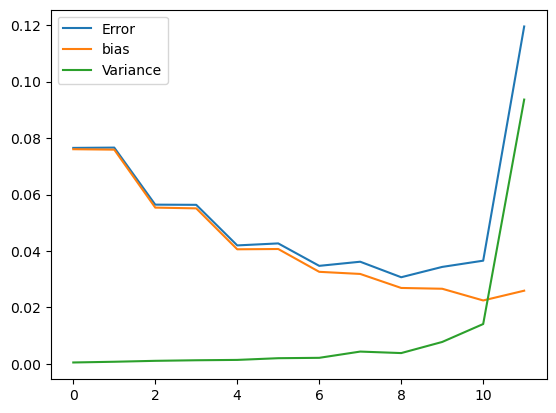

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(122)
n = 100
n_boostraps = 1000
maxdegree = 12


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = f(x) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

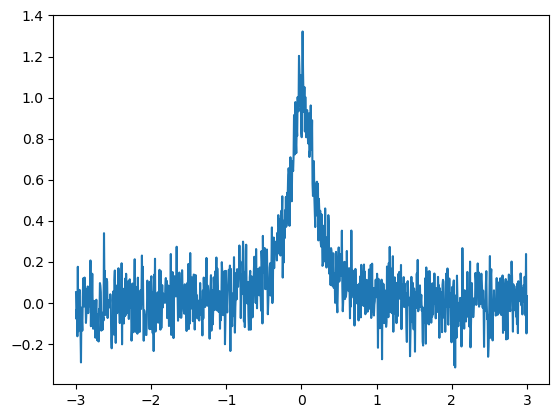

In [49]:

plt.plot(x,y)

Polynomial degree: 8
Error: 0.4982546171832255
Bias^2: 0.08280953891789791
Var: 0.4154450782653277
0.4982546171832255 >= 0.08280953891789791 + 0.4154450782653277 = 0.4982546171832256
Polynomial degree: 8
Error: 1.3549591494075421
Bias^2: 0.03828620921510846
Var: 1.3166729401924333
1.3549591494075421 >= 0.03828620921510846 + 1.3166729401924333 = 1.3549591494075417
Polynomial degree: 8
Error: 0.24289264707215447
Bias^2: 0.02474823342481327
Var: 0.21814441364734122
0.24289264707215447 >= 0.02474823342481327 + 0.21814441364734122 = 0.2428926470721545
Polynomial degree: 8
Error: 0.06110297062235281
Bias^2: 0.03253444222279684
Var: 0.028568528399555964
0.06110297062235281 >= 0.03253444222279684 + 0.028568528399555964 = 0.0611029706223528
Polynomial degree: 8
Error: 0.05300023460560902
Bias^2: 0.03247169521322885
Var: 0.02052853939238017
0.05300023460560902 >= 0.03247169521322885 + 0.02052853939238017 = 0.05300023460560902
Polynomial degree: 8
Error: 0.03852317809433426
Bias^2: 0.029893198591

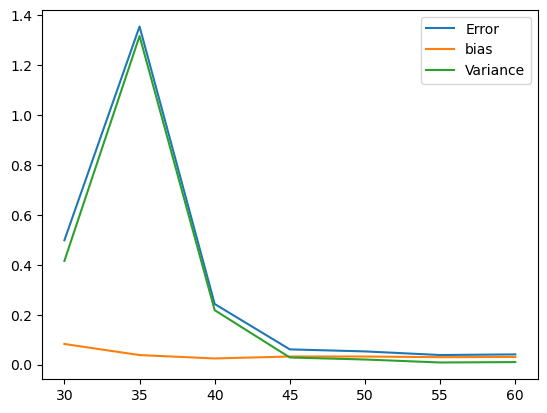

In [ ]:
#various n evaluated with bootstrap
np.random.seed(122)
n_boostraps = 1000
degree = 8

values_n = np.array([30,40,50,60])
# Make data set.
x = np.linspace(-3, 3, int(np.max(values_n)/0.8+2)).reshape(-1, 1)
y = f(x) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(len(values_n))
bias = np.zeros(len(values_n))
variance = np.zeros(len(values_n))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for k, n in enumerate(values_n):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    x_train_n, x_discard, y_train_n, y_discard = train_test_split(x_train, y_train, train_size = n)
    for i in range(n_boostraps):
        x_, y_ = resample(x_train_n, y_train_n)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    error[k] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[k] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[k] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[k])
    print('Bias^2:', bias[k])
    print('Var:', variance[k])
    print('{} >= {} + {} = {}'.format(error[k], bias[k], variance[k], bias[k]+variance[k]))

plt.plot(values_n, error, label='Error')
plt.plot(values_n, bias, label='bias')
plt.plot(values_n, variance, label='Variance')
plt.legend()
plt.show()

(12, 1)
(12,)
(12, 1)


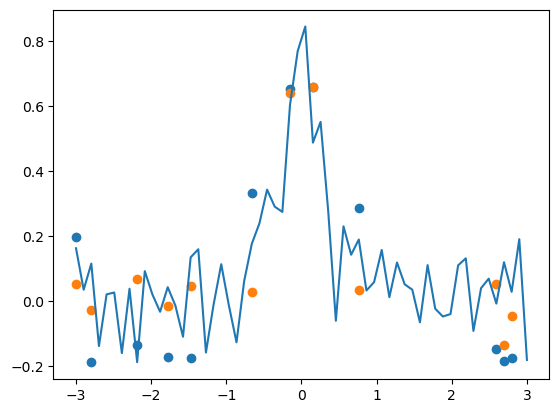

In [47]:
print(x_test.shape)
print(y_pred[:,0].shape)
print(y_test.shape)
plt.plot(x,y)
plt.scatter(x_test, y_pred[:,0])
plt.scatter(x_test, y_test)

### Part h):  Cross-validation as resampling techniques, adding more complexity

The aim here is to implement another widely popular
resampling technique, the so-called cross-validation method.  

Implement the $k$-fold cross-validation algorithm (feel free to use
the functionality of **Scikit-Learn** or write your own code) and
evaluate again the MSE function resulting from the test folds.

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code from the previous exercise. Comment and interpret your results. 

In addition to using the ordinary least squares method, you should
include both Ridge and Lasso regression in the final analysis.

## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis of parts g) and h).

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. 

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report.

## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.